Md. Tanvir Jawad<br>ID: 21101221

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.5 MB/s eta 0:00:00


In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [15]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r

    infected = system.beta * i * s
    recovered = system.gamma * i

    s -= infected
    i += infected - recovered
    r += recovered

    return State(s=s, i=i, r=r)

In [7]:
def make_system(beta, gamma):
    init = State(s=89, i=1, r=0)
    init /= init.sum()

    return System(init=init, t_end=7*14, beta=beta, gamma=gamma)


In [8]:
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init

    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)

    return frame

In [17]:
tc = 2
tr = 10

beta = 1 / tc
gamma = 1 / tr

system = make_system(beta, gamma)
results = run_simulation(system, update_func)

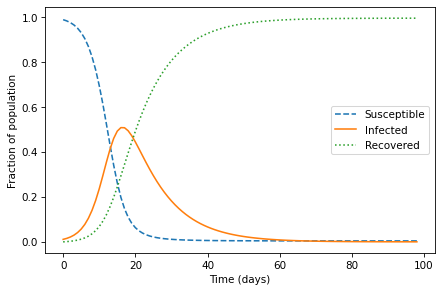

In [10]:
def plot_results(S, I, R):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Recovered')
    decorate(xlabel='Time (days)', ylabel='Fraction of population')

plot_results(results.s, results.i, results.r)